In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/3190proj_home_values.csv')

Mounted at /content/gdrive


In [ ]:
# transformation 1: removing rows with empty records
df_2 = df.dropna(axis=0, how='any')
fig1 = px.histogram(data_frame=df_2, x = '1/31/2001', title='Typical Home Values Across Different Areas in US in January 2001')
fig1.show()

In [ ]:
#transformation 2: Finding average of typical home value in each location from January 2000- October 2021; adding new column with these values
df_2.insert(267, "Average Typical Home Value Over 21 Yrs", df_2.mean(axis=1))
fig2 = px.histogram(data_frame=df_2, x = 'Average Typical Home Value Over 21 Yrs', title='Average Typical Home Value in each location Over 21 Years')
fig2.show()

In [ ]:
#transformation 3: organize data based on highest to lowest average THV
df_3 = df_2.sort_values(by='Average Typical Home Value Over 21 Yrs', ascending=True)
fig3 = px.bar(data_frame=df_3, x='RegionName', title='Average Typical Home Value in Ascending Order Organized by City')
fig3.show()

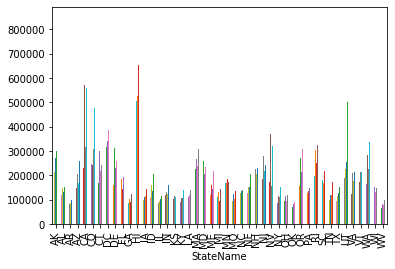

In [ ]:
#transformation 4: finding median values of typical home values (monthly and over 21 years) for each state regardless of specific city
groups = df_2.groupby(["StateName"]).median()
groups.plot.bar(legend=False)

In [ ]:
#transformation 5: add 2 columns with median price of homes in a location from January 2000- December 2010 and again from January 2011- October 2021
# row then column
df_2.insert(268, "Median Home Value 2001-2010", 0)
df_2.insert(269, "Median Home Value 2011-2021", 0)
df_2["Median Home Value 2001-2010"] = df_2.iloc[:,5:138].median(axis=1)
df_2["Median Home Value 2011-2021"] = df_2.iloc[:,139:268].median(axis=1)
fig5 = px.line(data_frame=df_2, x = 'SizeRank', y = 'Median Home Value 2001-2010', title='Median Home Values from 2001-2010')
fig5.show()
fig6 = px.line(data_frame=df_2, x = 'SizeRank', y = 'Median Home Value 2011-2021', title='Median Home Values from 2011-2021')
fig6.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

